# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [29]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

### Subsection 1

In [37]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y,W=None,b=None):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    if W is not None:
        divider_x = np.linspace(np.min(X[:,0]),np.max(X[:,0]))
        divider_y = -(W[0] / W[1]) * divider_x - b / W[1]  
        divider_y_left = -(W[0] / W[1]) * divider_x - (b-1) / W[1] 
        divider_y_right = -(W[0] / W[1]) * divider_x - (b+1) / W[1] 
        plt.plot(divider_x, divider_y, 'k')
        plt.plot(divider_x, divider_y_left, 'r--');
        plt.plot(divider_x, divider_y_right, 'b--');

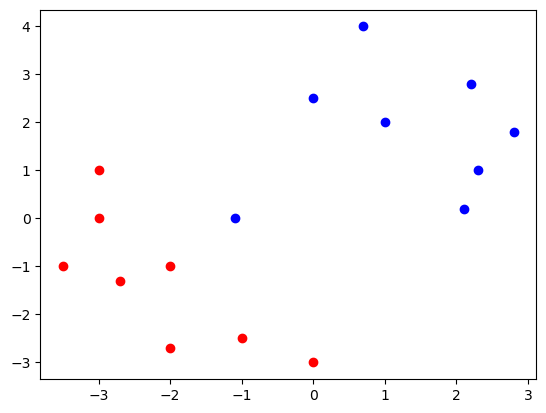

In [46]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

![Alt text](derivation.jpg)


In [54]:
# Write your code here

def svm(X,y):
    # I = np.eye(2)
    W = cp.Variable(2)
    b = cp.Variable(1)
    
    constraints = [cp.multiply(y,X@W+b)-1>=0]
    objective = cp.Minimize(0.5*cp.square((cp.norm(W))))

    prob = cp.Problem(objective,constraints)
    prob.solve()
    print(f"W:{W.value} b:{b.value[0]}")
    return W.value,b.value[0]
    

def svm_soft(X,y,C):
    W = cp.Variable(2)
    b = cp.Variable(1)
    psi = cp.Variable(X.shape[0])
    constraints = [cp.multiply(y,X@W+b)-1+psi>=0,psi>=0]
    objective = cp.Minimize(0.5*cp.square((cp.norm(W))) + C*cp.sum(psi))

    prob = cp.Problem(objective,constraints)
    prob.solve()
    print(f"W:{W.value} b:{b.value[0]}")
    return [W.value,b.value[0],psi.value]

In [48]:
[W,b] = svm(X,y)

W:[-1.73913043 -1.30434783] b:-2.9130434780347696


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

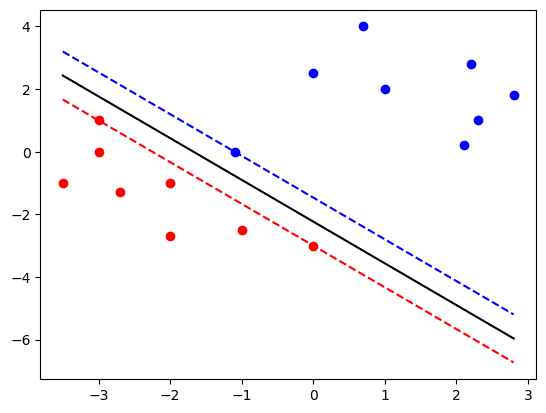

In [49]:
# Write your code here
plot_points(X,y,W,b)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

In [50]:
# Re-create the Synthetic Data by adding the points and visualize the points
X = np.append(X,np.array([[-4,-10],[4,4]]),axis=0)
y = np.append(y,np.array([1,-1]))

W:[-1.73913043 -1.30434783] b:-2.913043478291523


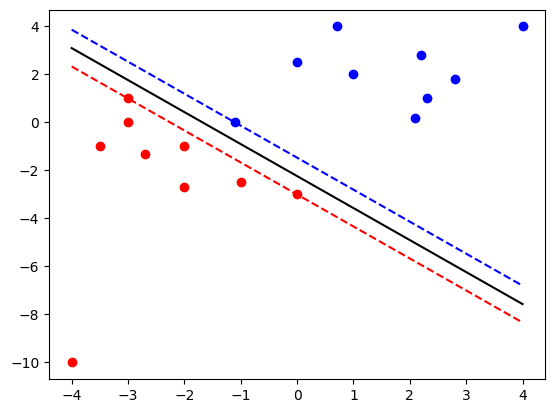

In [51]:
# Solve for the decision boundary using this modified dataset
[W,b] = svm(X,y)
plot_points(X,y,W,b)

The boundary remains unchanged since the data points in question do not become support vectors, nor do they violate the boundary condition. This is due to the fact that they satisfy the inequality $y_i(w^Tx_i+b)>1$.

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

W:[-0.22506809 -0.19858949] b:0.013672204267370152


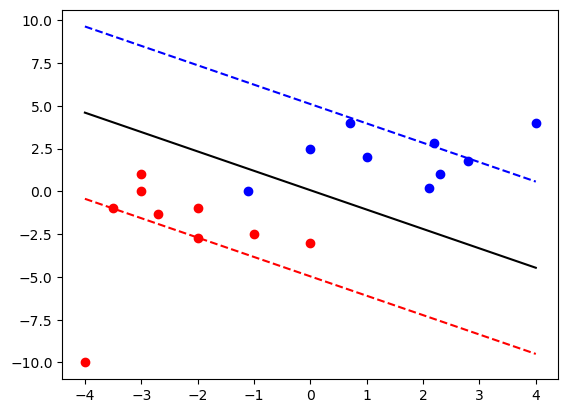

In [56]:
# Write your code here for C= 0.01
[W,b,psi] = svm_soft(X,y,0.01)
plot_points(X,y,W,b)

W:[-0.38493724 -0.35146444] b:-0.12133891201898916


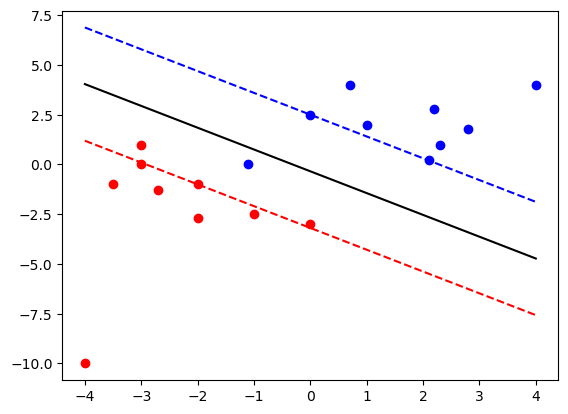

In [60]:
# Write your code here for C= 0.1
[W,b,psi] = svm_soft(X,y,0.1)
plot_points(X,y,W,b)

W:[-1.73913043 -1.30434783] b:-2.9130434782869634


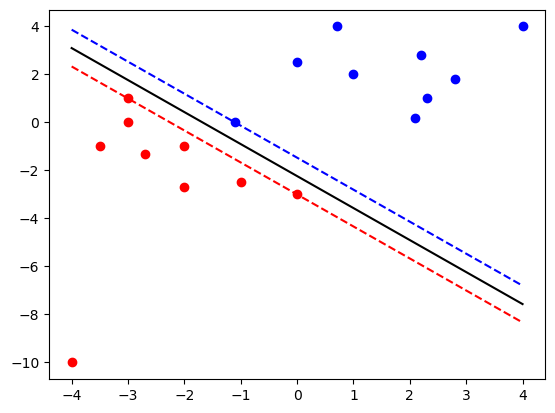

In [61]:
# Write your code here for C= 3
[W,b,psi] = svm_soft(X,y,3)
plot_points(X,y,W,b)

W:[-1.73913043 -1.30434783] b:-2.9130434783574235


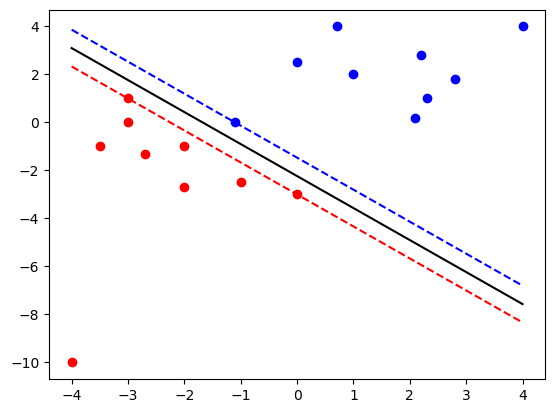

In [62]:
# Write your code here for C= 10
[W,b,psi] = svm_soft(X,y,10)
plot_points(X,y,W,b)

W:[-1.73913044 -1.30434783] b:-2.9130434786825745


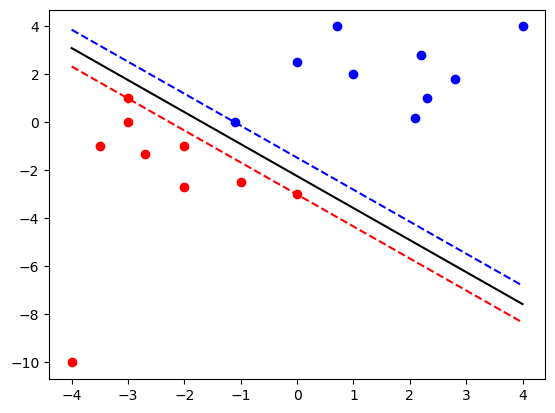

In [64]:
# Write your code here for C= 100
# Write your code here for C= 0.1
[W,b,psi] = svm_soft(X,y,100)
plot_points(X,y,W,b)

Lower the value of C, lower is the cost of misclassification. Hence, for lower values of C, margin doesn't do good job of separting blue and red points. After C=3, boundary doesn't change and there are no misclassifications.

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

W:[-0.38493724 -0.35146444] b:-0.12133891214351254


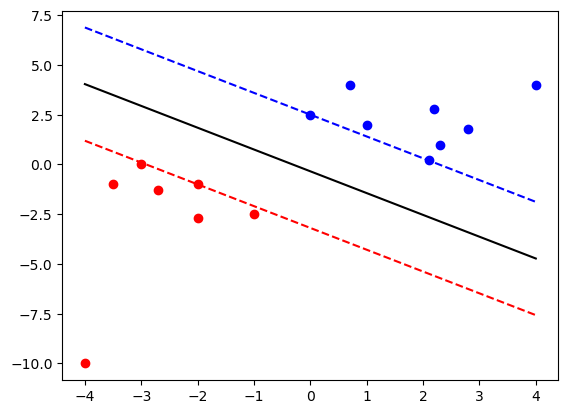

In [73]:
# Write your Code here
support_vectors = [2,7,8]
mask = np.ones(X.shape[0], dtype=bool)
mask[support_vectors] = False

X_ = X[mask]
y_ = y[mask]

[W,b,psi] = svm_soft(X_,y_,100)
plot_points(X_,y_,W,b)

The support vectors play a crucial role in defining the margin of a support vector machine. Removing any of them would necessarily affect the position of the boundary, as the margin relies solely on the support vectors. Thus, removing a support vector would lead to the emergence of a new boundary that maximizes the distance between the classes. 

### Subsection 2

In [1]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

--2023-03-26 20:34:31--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  5.50MB/s    in 1.7s    

2023-03-26 20:34:33 (5.50 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-26 20:34:34--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘samples/train-labels-idx1-ubyte.gz’

train-label

In [2]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [3]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [4]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [5]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [17]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
def perform(C, kernel, gamma):
  print(f"Kernel: {kernel}, Gamma: {gamma}, C: {C}")

  svm = SVC(C = C, kernel=kernel, gamma=gamma)
  svm.fit(X_train,y_train)

  prediction = svm.predict(X_test)

  print('F1 Score:',f1_score(y_test, prediction, average='weighted'))
  print('Accuracy:',accuracy_score(y_test, prediction))
  print('R squared:',r2_score(y_test, prediction))
  print('Confusion Matrix:')
  sns.heatmap(confusion_matrix(y_test, prediction))
  plt.show()
    

Kernel: rbf, Gamma: 0.001, C: 0.01
F1 Score: 0.06506842474768518
Accuracy: 0.16333333333333333
R squared: -1.2105743220866008
Confusion Matrix:


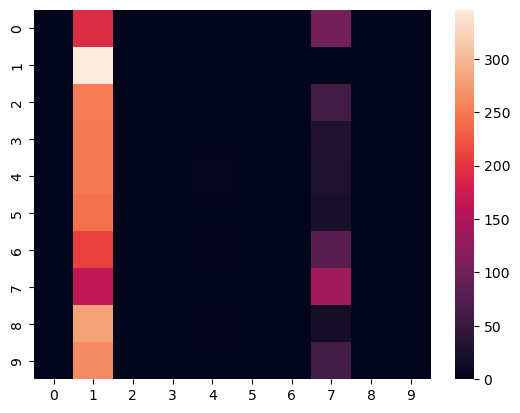

Kernel: linear, Gamma: 0.001, C: 0.01
F1 Score: 0.8968589916605739
Accuracy: 0.8973333333333333
R squared: 0.8152428677784763
Confusion Matrix:


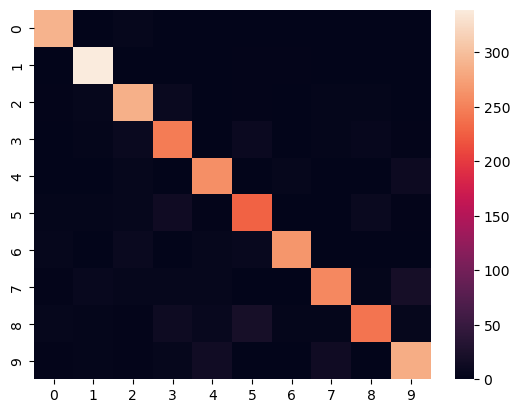

Kernel: rbf, Gamma: 1e-05, C: 0.01
F1 Score: 0.023852560270970314
Accuracy: 0.11533333333333333
R squared: -1.4132374318802543
Confusion Matrix:


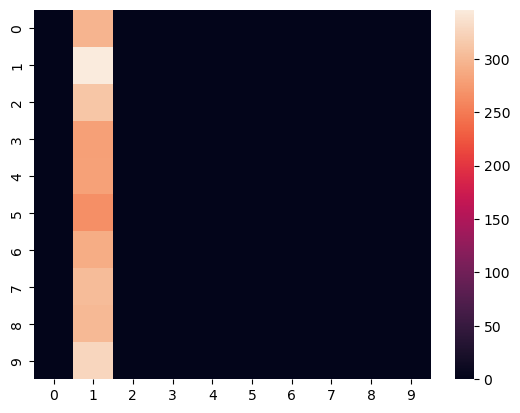

Kernel: linear, Gamma: 1e-05, C: 0.01
F1 Score: 0.8968589916605739
Accuracy: 0.8973333333333333
R squared: 0.8152428677784763
Confusion Matrix:


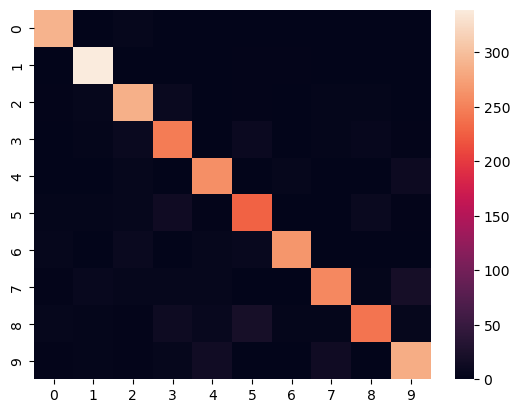

Kernel: rbf, Gamma: 0.001, C: 1
F1 Score: 0.8936340988902742
Accuracy: 0.8933333333333333
R squared: 0.7999336445295773
Confusion Matrix:


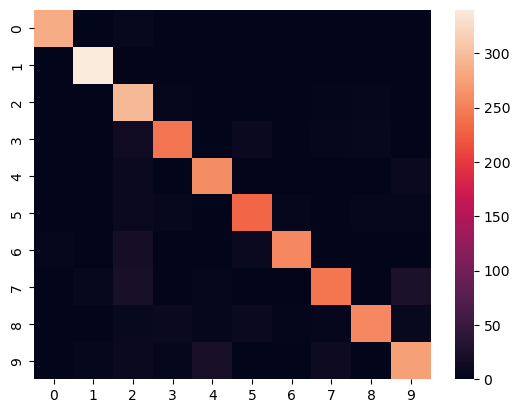

Kernel: linear, Gamma: 0.001, C: 1
F1 Score: 0.8914469589778699
Accuracy: 0.892
R squared: 0.8049333655399772
Confusion Matrix:


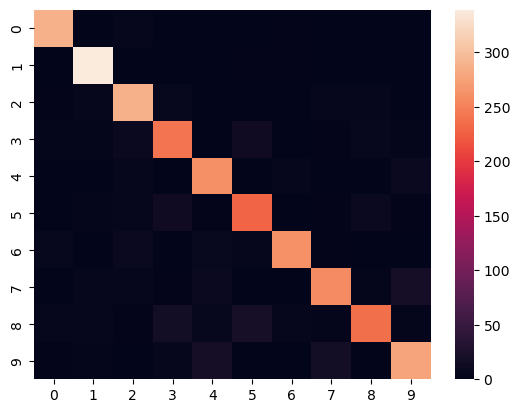

Kernel: rbf, Gamma: 1e-05, C: 1
F1 Score: 0.4438664232540719
Accuracy: 0.5043333333333333
R squared: -0.12509225744883823
Confusion Matrix:


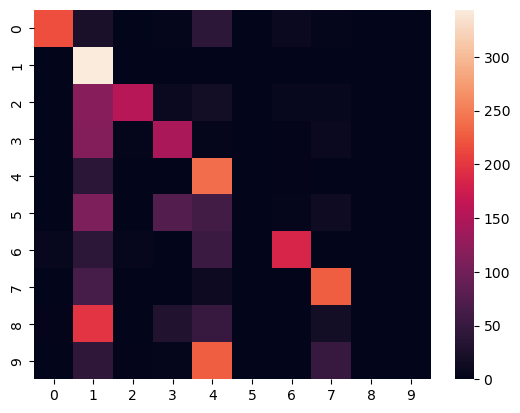

Kernel: linear, Gamma: 1e-05, C: 1
F1 Score: 0.8914469589778699
Accuracy: 0.892
R squared: 0.8049333655399772
Confusion Matrix:


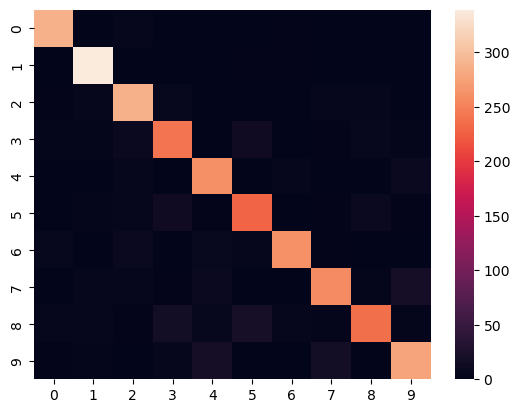

Kernel: rbf, Gamma: 0.001, C: 10
F1 Score: 0.9044517706275457
Accuracy: 0.904
R squared: 0.8196612258806902
Confusion Matrix:


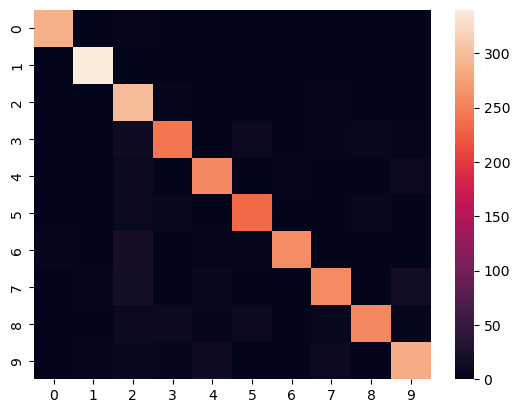

Kernel: linear, Gamma: 0.001, C: 10
F1 Score: 0.8914469589778699
Accuracy: 0.892
R squared: 0.8049333655399772
Confusion Matrix:


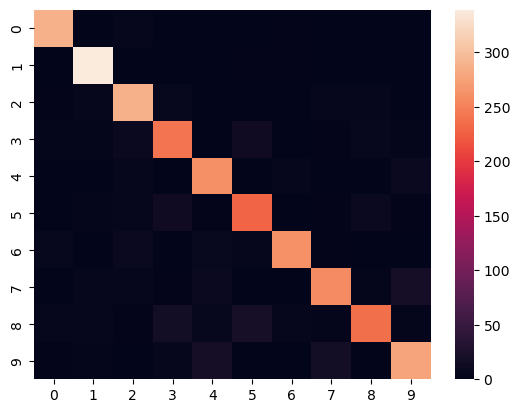

Kernel: rbf, Gamma: 1e-05, C: 10
F1 Score: 0.8585324885368532
Accuracy: 0.859
R squared: 0.7160235981147254
Confusion Matrix:


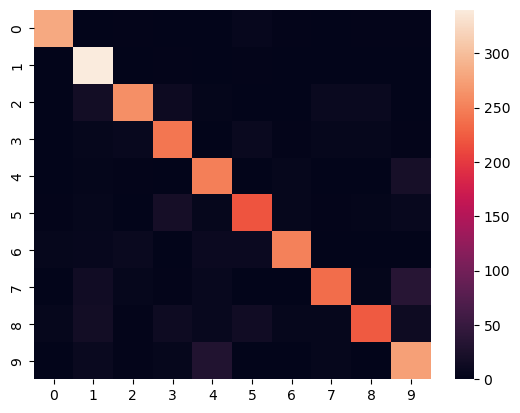

Kernel: linear, Gamma: 1e-05, C: 10
F1 Score: 0.8914469589778699
Accuracy: 0.892
R squared: 0.8049333655399772
Confusion Matrix:


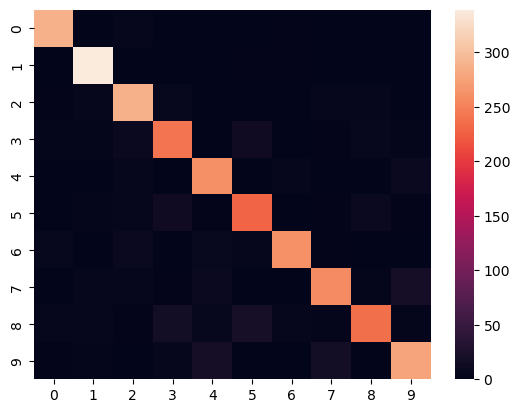

In [27]:
for C in [0.01,1,10]:
    for gamma in [1e-3, 1e-5]:
      for kernel in ['rbf', 'linear']:
        perform(C, kernel, gamma)